<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.6

Name: Juan Manuel

Date: February 2021


### 1. Process description 

A closed stirred-tank reactor with two compartments
is shown in Fig. 1. The basic idea is to feed the reactants
continuously into the first compartment, where they will be
preheated by energy liberated in the exothermic reaction,
which is anticipated to occur primarily in the second compartment. The wall separating the two compartments is
quite thin, thus allowing heat transfer; the outside of the
reactor is well insulated; and a cooling coil is built into
the second compartment to remove excess energy liberated in
the reaction. Both tanks are completely full at all times.
Tests are to be conducted initially with a single-component
feed (i.e., no reaction) to evaluate the reactor’s thermal
characteristics

### 2. Assumptions 

* Constant density 

* Constant Cp

* Constant Volume

* Insulated process 

* There is no reaction 

### 3. Process Scheme

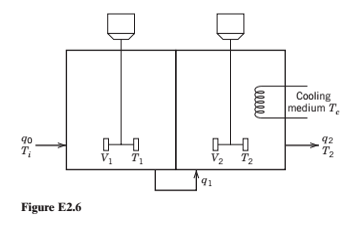

Figure 1. Scheme of the process with the two compartments 

### 4. Analysis 

#### Establish the model 

Mass balance in the first tank 

$$
\frac{dm_1}{dt} = \rho q_i - \rho q_1
$$

$$
\rho\frac{dV_1}{dt} = \rho q_i - \rho q_1 = 0 \hspace{1cm} \rightarrow \hspace{1cm} q_1 = q_i 
$$

Energy balance in the first tank 

$$
\frac{dH_1}{dt} = \rho q_i \hat{H}_i - \rho q_1 \hat{H}_1 + U_t A_t (T_2 - T_1)
$$

$$
\rho V_1 C_p\frac{dT_1}{dt} = \rho q_i C_p (T_i - T_1) + U_t A_t (T_2 - T_1) \tag{1}
$$

Mass balance in the second tank 

$$
\frac{dm_2}{dt} = \rho q_1 - \rho q_2
$$

$$
\rho\frac{dV}{dt} = \rho q_1 - \rho q_2 = 0 \hspace{1cm} \rightarrow \hspace{1cm} q_1 = q_2
$$

Energy balance tank 2

$$
\frac{dH_2}{dt} = \rho q_1 \hat{H}_1 - \rho q_2 \hat{H}_2 - U_t A_t (T_2 - T_1) - U_c A_c (T_2 - T_c)
$$

$$
\rho V_2 C_p \frac{dT_2}{dt} = \rho q_i C_p (T_1 - T_2) - U_t A_t (T_2 - T_1) - U_c A_c (T_2 - T_c) \tag{2}
$$

#### Degrees of freedon analysis

state variables: T1, T1 (2)

equation: 2 DE (2)

degrees of freedon: 2- 2 = 0 

inputs: qi, Ti, Tc

parameters: V1, V2, $\rho$, Cp, Ut, Uc, At, Ac

#### Simulate the model 

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [10]:
# write the model 

def heater(s,t,u,p):

    # state variables
    T1 = s[0]
    T2 = s[1]

    # inputs
    qi = u[0]
    Ti = u[1]
    Tc = u[2]

    # parameters
    V1 = p[0]
    V2 = p[1] 
    rho = p[2]
    Cp = p[3] 
    Ut = p[4] 
    Uc = p[5] 
    At = p[6] 
    Ac = p[7]

    # energy balance in tank 1

    dT1dt = qi/V1*(Ti - T1) + Ut*At/(V1*Cp*rho)*(T2 - T1)

    dT2dt = qi/V2*(T1 - T2) - Ut*At/(V2*Cp*rho)*(T2 - T1) - Uc*Ac/(V2*Cp*rho)*(T2 - Tc)

    return [dT1dt, dT2dt]

In [64]:
# establish parameters
V1 = 0.5 # m3
V2 = 0.6 # m3
rho = 1000 # kg/m3
Cp = 4186 # J/(K*kg)
Ut = 100 # J/(m2 K) 
Uc = 120 # J/(m2 K)
At = 0.2 # m2
Ac = 0.1 # m2
p = [V1, V2, rho, Cp, Ut, Uc, At, Ac]

In [71]:
# establish inputs 
qi = 0.5 # m3/min
Ti = 400 # K
Tc = 180 # k

u = [qi, Ti, Tc]

In [72]:
# establish initial conditions 
s = [300, 300] # K, K

In [73]:
# integration time 
time = np.linspace(0, 10, 100)

In [74]:
out = odeint(heater, s, time, args= (u, p))

In [75]:
T1 = out[:,0]
T2 = out[:,1]

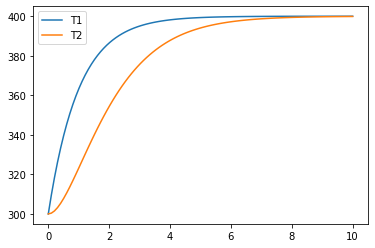

In [76]:
plt.plot(time, T1, time, T2)
plt.legend(["T1", "T2"])